In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

df = pd.read_csv(r'C:\Users\nurub\Downloads\Movie\movies.csv')

In [58]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,533,5,0,2009,604,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162,31
7445,535,5,0,2019,146,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181,41
3045,6896,5,6,1997,610,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194,19
6663,5144,5,0,2015,606,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138,37
7244,536,5,0,2018,154,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149,40


In [4]:
# Checking for missing data

for col in df.columns:
    pt_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pt_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
# Checking the Data Types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [60]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,533,5,0,2009,604,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162,31
7445,535,5,0,2019,146,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181,41
3045,6896,5,6,1997,610,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194,19
6663,5144,5,0,2015,606,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138,37
7244,536,5,0,2018,154,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149,40


In [20]:
# Replacing NaN with 0
df['released'] = df['released'].fillna(0)
df['score'] = df['score'].fillna(0)
df['votes'] = df['votes'].fillna(0)
df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)
df['runtime'] = df['runtime'].fillna(0)


In [25]:

>>> df.votes.astype(int)
>>> df.budget.astype(int)
>>> df.gross.astype(int)
>>> df.runtime.astype(int)

0       146
1       104
2       124
3        88
4        98
       ... 
7663     90
7664     90
7665      0
7666    120
7667    102
Name: runtime, Length: 7668, dtype: int32

In [61]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,533,5,0,2009,604,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162,31
7445,535,5,0,2019,146,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181,41
3045,6896,5,6,1997,610,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194,19
6663,5144,5,0,2015,606,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138,37
7244,536,5,0,2018,154,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149,40


In [23]:
# Checking the Data Types of Columns

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['votes'] = df['votes'].astype('int64')

df['runtime'] = df['runtime'].astype('int64')

In [24]:
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020",0.0,0,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120


In [33]:
# Creating the Correct Year Column

df['correct_year'] = df['released'].astype(str).str[-4:]

In [35]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020",0.0,0,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120,2020


In [56]:
#Sorting Table by Gross

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [37]:
#Dropping the Duplicates

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020",0.0,0,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120,2020


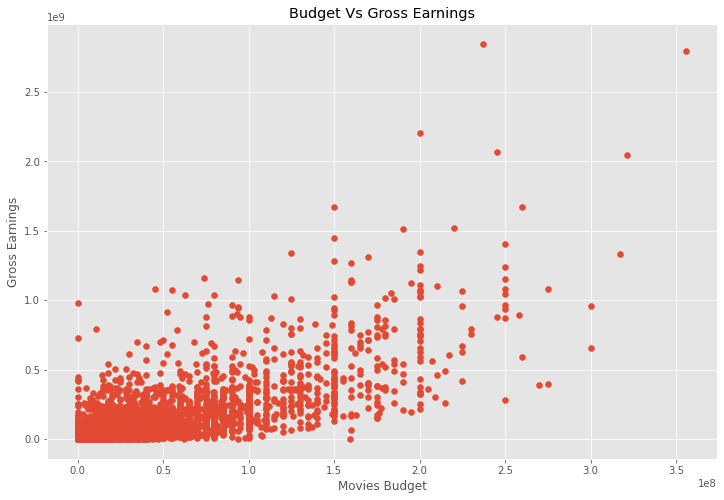

In [40]:
#Plotting a Scatter plot for Budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget Vs Gross Earnings')

plt.xlabel('Movies Budget')

plt.ylabel('Gross Earnings')

plt.show()

In [42]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


<AxesSubplot:xlabel='budget', ylabel='gross'>

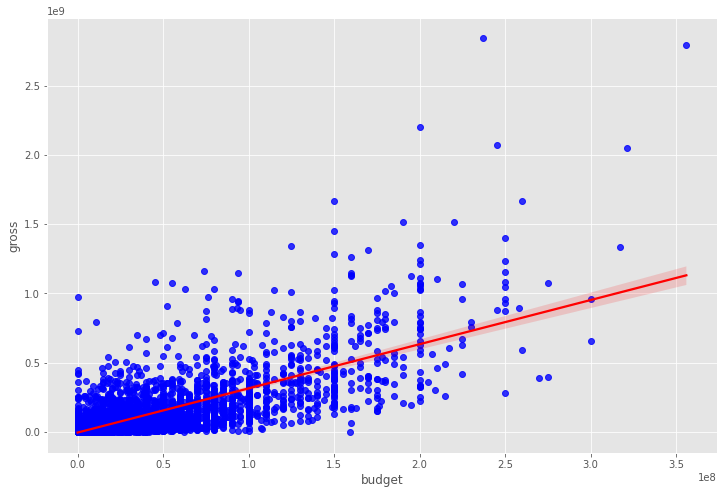

In [47]:
#Budget vs Gross using Seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

In [49]:
# Looking at the Correlations


In [52]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


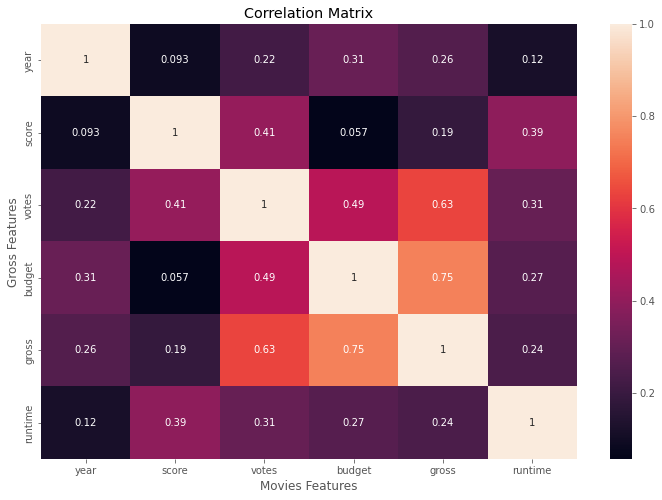

In [53]:
Correlation_Matrix = df.corr(method='pearson')

sns.heatmap(Correlation_Matrix, annot=True)

plt.title('Correlation Matrix')

plt.xlabel('Movies Features')

plt.ylabel('Gross Features')

plt.show()